(150, 4)
prediction => [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]

{'bootstrap': False, 'contamination': 0.01, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 0, 'verbose': 0, 'warm_start': False}

[ 0.2284453   0.21120515  0.18836861  0.17730326  0.22619241  0.13718916
  0.14418249  0.23838212  0.10662202  0.16483981  0.18925863  0.20947019
  0.15906971  0.0187915   0.05825896  0.05186411  0.12458093  0.20567511
  0.11109214  0.19181629  0.16810467  0.18527608  0.07158944  0.14875709
  0.14309534  0.20100659  0.18974086  0.223415

Text(0.5, 1.0, 'Anomalie')

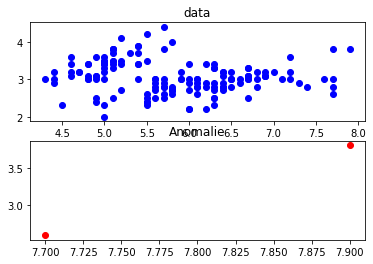

In [56]:
from sklearn.ensemble import *
from sklearn.preprocessing import *
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np 


iris=load_iris()
x=iris.data
y=iris.target
 
print(x.shape)
## Isolation forest : faible nombre de split(trait_Othogonaux) = forte probabilites d'anomalie 
modele=IsolationForest(random_state=0,contamination=0.01) #contamionation pour preciser le pourcentage de dechets de donnees (1%)
modele.fit(x)
print("prediction =>", modele.predict(x)) #1 pour valeures intermediares -1 : valeures aberrantes 
print("")
print(modele.get_params())
print("")
print(modele.decision_function(x)) ##score moyen de normalite 
print(modele.n_features_in_)

##affichage d'anomalie 
anomalie = modele.predict(x) == -1
print(anomalie)
print("")
print("anomalies => ",x[anomalie])
print(x[anomalie].shape)

##visualisation d'anomalie 
fig1=plt.figure()
fig1.add_subplot(2,1,1)
plt.scatter(x[:,0],x[:,1],c='b')
plt.title("data")

fig1.add_subplot(2,1,2)
plt.scatter(x[anomalie][:,0],x[anomalie][:,1],c='r')
plt.title("Anomalie")



(1797, 64)
(1797,)
(1797, 8, 8)


c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\covariance\_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


prediction => [1 1 1 ... 1 1 1]
[False False False ... False False False]
nombre d'anomalie detecte => 18


Text(0.5, 1.0, '1')

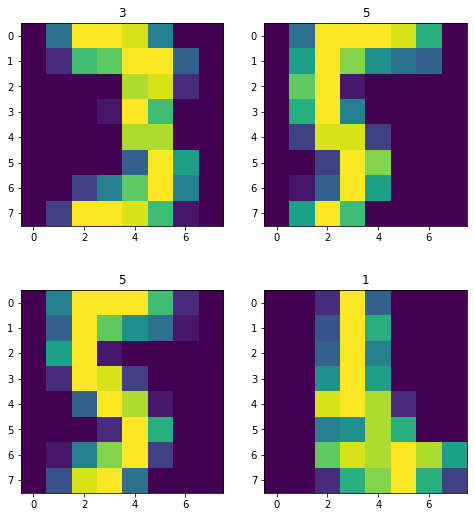

In [69]:
#### data : load_digits ######
from sklearn.datasets import load_digits
from sklearn.covariance import *

digits=load_digits()
image=digits.images
x1=digits.data
y1=digits.target

print(x1.shape)
print(y1.shape)
print(image.shape)

## modele : EllipticEnvelope ### hypotheses : data suit une lui normale et apprend une ellipse
modele2=EllipticEnvelope(random_state=0,contamination=0.01)
modele2.fit(x1)
print("prediction =>",modele2.predict(x1))

anomalie_2= modele2.predict(x1)== -1
print(anomalie_2)
print("nombre d'anomalie detecte =>",x1[anomalie_2].shape[0])

##visualisation de quelques anomalie ##
fig2=plt.figure(figsize=(8,9))
fig2.add_subplot(2,2,1)
plt.imshow(image[anomalie_2][1])
plt.title(y1[anomalie_2][1])

fig2.add_subplot(2,2,2)
plt.imshow(image[anomalie_2][2])
plt.title(y1[anomalie_2][2])

fig2.add_subplot(2,2,3)
plt.imshow(image[anomalie_2][3])
plt.title(y1[anomalie_2][3])

fig2.add_subplot(2,2,4)
plt.imshow(image[anomalie_2][4])
plt.title(y1[anomalie_2][4])



prediction => [1 1 1 ... 1 1 1]
[False False False ... False False False]
nombre d'anomalie detecte => 18


Text(0.5, 1.0, '3')

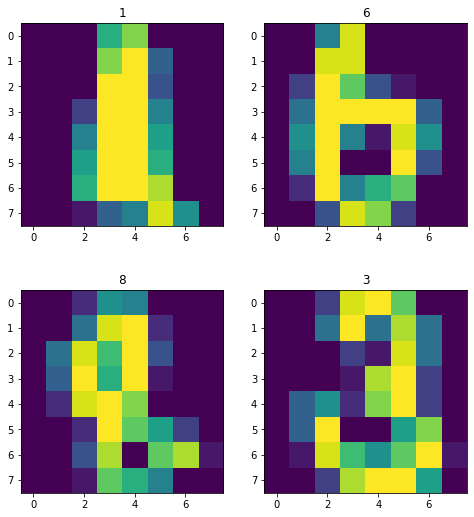

In [72]:
from sklearn.neighbors import *

## modele : local outlier factor  ### le score d'anomalie dépend du degré d'isolement de l'objet par rapport au voisinage

modele3=LocalOutlierFactor(contamination=0.01)
print("prediction =>",modele3.fit_predict(x1)) #utiliser fit_predict si on travail avec du train_set (novelty=False)

anomalie_3= modele3.fit_predict(x1)== -1
print(anomalie_3)
print("nombre d'anomalie detecte =>",x1[anomalie_3].shape[0])

##visualisation de quelques anomalie ##
fig2=plt.figure(figsize=(8,9))
fig2.add_subplot(2,2,1)
plt.imshow(image[anomalie_3][1])
plt.title(y1[anomalie_3][1])

fig2.add_subplot(2,2,2)
plt.imshow(image[anomalie_3][2])
plt.title(y1[anomalie_3][2])

fig2.add_subplot(2,2,3)
plt.imshow(image[anomalie_3][3])
plt.title(y1[anomalie_3][3])

fig2.add_subplot(2,2,4)
plt.imshow(image[anomalie_3][4])
plt.title(y1[anomalie_3][4])
